# Simple script to visualize a scenario 
Uses the ```viz``` api in ```av2-api/src/av2/datasets/motion_forecasting/viz/scenario_visualization.py```

In [1]:
from av2.datasets.motion_forecasting.viz import scenario_visualization
from av2.datasets.motion_forecasting.data_schema import ArgoverseScenario
from av2.map.map_api import ArgoverseStaticMap

from argparse import Namespace
from pathlib import Path

import pandas as pd
import os


from av2.datasets.motion_forecasting import scenario_serialization

In [2]:
# static_map_path: Path to the JSON file containing map data. The file name must match
# the following pattern: "log_map_archive_{log_id}.json".
# path to where the logs live
dataroot = "/home/vgrwbx/workspace/OL_trajectoryprediction/data/val/raw"
# dataroot = '/home/vgrwbx/data/datasets/test'

# unique log identifier
# log_id = '0a0af725-fbc3-41de-b969-3be718f694e2'
log_id='0a6d719c-5e28-4bc4-a438-c8b1e5bc859c'
# log_id = "adc7a713-efdf-40db-a952-e55f1fcda675"

In [3]:
args = Namespace(**{"dataroot": Path(dataroot), "log_id": Path(log_id)})

In [4]:
log_map_dirpath = Path(args.dataroot) / args.log_id 

print(log_map_dirpath)

scenario_static_map = ArgoverseStaticMap.from_map_dir(log_map_dirpath, build_raster=False)

/home/vgrwbx/workspace/OL_trajectoryprediction/data/val/raw/0a6d719c-5e28-4bc4-a438-c8b1e5bc859c


In [5]:
print(scenario_static_map)

ArgoverseStaticMap(log_id='raw', vector_drivable_areas={10254753: DrivableArea(id=10254753, area_boundary=[Point(x=2671.97, y=3293.2, z=-33.93), Point(x=2661.68, y=3289.94, z=-33.93), Point(x=2658.98, y=3295.27, z=-34.01), Point(x=2652.41, y=3308.04, z=-34.03), Point(x=2651.88, y=3309.16, z=-34.06), Point(x=2651.06, y=3310.66, z=-34.11), Point(x=2650.55, y=3311.48, z=-34.14), Point(x=2650.12, y=3312.06, z=-34.15), Point(x=2649.67, y=3312.53, z=-34.17), Point(x=2649.22, y=3312.88, z=-34.19), Point(x=2648.77, y=3313.13, z=-34.2), Point(x=2648.35, y=3313.26, z=-34.2), Point(x=2647.83, y=3313.33, z=-34.2), Point(x=2647.03, y=3313.35, z=-34.22), Point(x=2645.67, y=3313.27, z=-34.23), Point(x=2633.42, y=3311.31, z=-34.23), Point(x=2615.07, y=3308.26, z=-34.26), Point(x=2610.0, y=3307.42, z=-34.26), Point(x=2610.0, y=3330.52, z=-34.45), Point(x=2629.89, y=3333.96, z=-34.4), Point(x=2632.05, y=3334.39, z=-34.42), Point(x=2632.67, y=3334.62, z=-34.43), Point(x=2633.28, y=3334.99, z=-34.44), Poi

In [6]:
scenario = pd.read_parquet(os.path.join(log_map_dirpath, f'scenario_{log_id}.parquet'))

In [7]:
print(scenario['timestep'] )

0         0
1         1
2         2
3         3
4         4
       ... 
2316    105
2317    106
2318    107
2319    108
2320    109
Name: timestep, Length: 2321, dtype: int64


In [8]:
test_scenario = scenario_serialization.load_argoverse_scenario_parquet(
        os.path.join(log_map_dirpath, f'scenario_{log_id}.parquet')
    )

In [9]:
print(test_scenario.tracks )

[Track(track_id='96515', object_states=[ObjectState(observed=True, timestep=0, position=(2733.9475058718326, 3342.5236871132947), heading=-2.9836631357840466, velocity=(-15.36585809176518, -2.4813181968000535)), ObjectState(observed=True, timestep=1, position=(2733.3464945050923, 3342.4314007391467), heading=-2.984816628123969, velocity=(-15.36585809176518, -2.4813181968000535)), ObjectState(observed=True, timestep=2, position=(2732.561267181248, 3342.3085134111566), heading=-2.985388929468395, velocity=(-15.363374418508506, -2.484651612775623)), ObjectState(observed=True, timestep=3, position=(2731.596359262625, 3342.1548472243576), heading=-2.985502468324945, velocity=(-15.380710302284172, -2.4918080093869683)), ObjectState(observed=True, timestep=4, position=(2730.4594811655347, 3341.973321420536), heading=-2.9857316852128863, velocity=(-15.41767323485105, -2.4915535223078176)), ObjectState(observed=True, timestep=5, position=(2729.161974418523, 3341.765682675751), heading=-2.985965

In [10]:
save_path = Path('~/workspace/OL_trajectoryprediction/videos/test')

In [11]:
# scenario_visualization.visualize_scenario(test_scenario,scenario_static_map, save_path)

In [12]:
import visualization

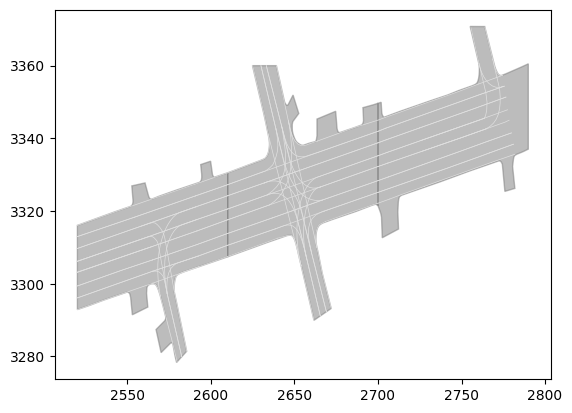

In [13]:
visualization.plot_map(scenario_static_map)

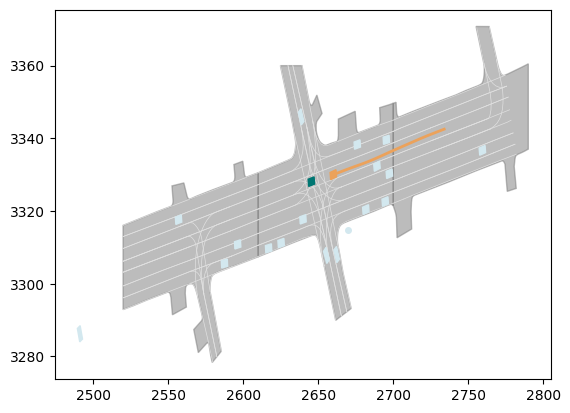

In [14]:
visualization.plot_map_history(scenario_static_map,test_scenario)

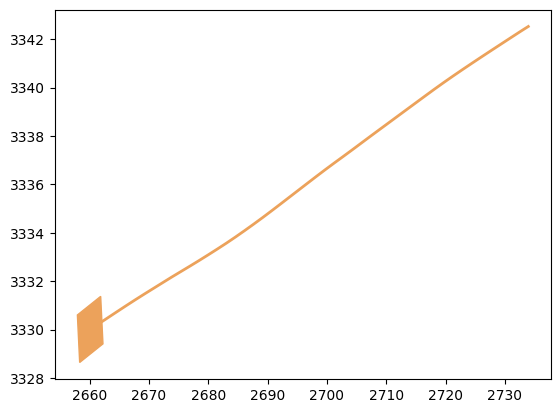

In [15]:
visualization.plot_target_history(test_scenario)

In [16]:
import submission
from pathlib import Path

In [17]:
ol_submission = submission.ChallengeSubmission.from_parquet(Path('/home/vgrwbx//workspace/OL_trajectoryprediction/submission.parquet'))
for i in ol_submission.predictions:
    print(i)

06e568ca-454b-4cd2-819e-77c54f024288
705bf89c-7464-4f36-bec3-ee61d2b2f174
7103fee0-bd5e-4fa3-a8e0-f9753ca1ecf7
7b5f62d4-8671-46c1-9341-289e730ba193
9b3d31c3-aeaa-4a38-8bd1-e4729a175df9
9dcf878b-f6d1-4e54-9001-ade8d8ef68a4
a2d64451-4a91-4c5e-898a-3082fb47fd29
af678799-53df-4c33-a827-3daa31c1679d
bd8b1407-3a58-4278-bf78-14225acf443e
dc650b19-e082-4c60-9f65-50214a0363d6


In [18]:
# visualization.visualize_scenario(test_scenario,scenario_static_map, save_path)